<a href="https://colab.research.google.com/github/tassid/trabalho_2_ia_1/blob/main/Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 2 - Algoritmo Genético
Tassiane Anzolin

## Escopo


O trabalho consiste em implementar um algoritmo genético para montar a grade horários
do curso de Ciência da Computação do campus Santa Helena do 1º ao 4º período.
O algoritmo deve gerar uma distribuição de disciplinas onde não existam conflitos entre os
horários de disciplinas que são pré-requisito e suas correspondentes e nem de horários
dos professores, onde um professor não pode ministrar diferentes disciplinas no mesmo
dia e horário.
As disciplinas do curso podem ser obtidas no site da UTFPR Santa Helena, abaixo seguem
links de trabalhos que explicam como modelar o problema.
Deve ser feito um relatório explicando cada estratégia adotada na montagem do algoritmo
genético, desde a codificação dos cromossomos até a escolha da condição para finalizar
o algoritmo.

Requisitos do Trabalho:
* Codificar o algoritmo genético ou utilizar algum framework/biblioteca
* Desenvolver estratégias para cada etapa do algoritmo
* Executar pelo menos 500 iterações do ciclo do algoritmo genético.
* Gerar um relatório final com os melhores resultados encontrados

#Relatório

## Definição do Problema
O código aborda o problema de agendar horários acadêmicos para um conjunto de disciplinas ao longo de vários períodos, levando em consideração restrições como disponibilidade de professores, carga horária das disciplinas e evitar conflitos de horários.

O problema de agendamento é abordado usando um Algoritmo Genético implementado com a biblioteca DEAP. Componentes-chave incluem:

* Representação do Cromossomo: Cada indivíduo na população representa um possível horário, consistindo de pares de disciplinas e professores atribuídos.

* Avaliação de Aptidão (Fitness): A função de aptidão visa minimizar conflitos e maximizar a distribuição total de carga horária entre os professores.

* Operadores Genéticos: Crossover de dois pontos e mutação de embaralhamento são usados para criar diversidade genética.

* População e Gerações: Uma população de indivíduos é evoluída ao longo de um número especificado de gerações usando a função eaMuPlusLambda.

### Dados de Entrada
Os dados incluem informações sobre disciplinas e professores, incluindo disponibilidade e carga horária. Disciplinas são atribuídas a períodos específicos, dias e meses.

### Saída
O algoritmo gera o melhor horário encontrado após o número especificado de gerações. Isso inclui a atribuição de disciplinas a períodos, dias e professores específicos.

### Melhor Horário
O melhor horário é impresso, exibindo as disciplinas e professores atribuídos para cada período e dia da semana.

### Melhor Horário
O melhor horário é impresso, exibindo as disciplinas e professores atribuídos para cada período e dia da semana.

## Conclusão
O algoritmo genético gera com sucesso um horário acadêmico otimizado, considerando diversas restrições. A abordagem demonstra a flexibilidade e eficiência de algoritmos genéticos na resolução de problemas complexos de agendamento.

# DEAP e Python

Este projeto se beneficia da implementação eficiente de algoritmos genéticos proporcionada pela biblioteca DEAP (Distributed Evolutionary Algorithms in Python). A biblioteca DEAP oferece uma ampla gama de funcionalidades para a implementação de algoritmos genéticos e algoritmos evolutivos distribuídos em Python. Sua flexibilidade e desempenho tornam-na uma escolha robusta para lidar com problemas complexos, como o desafiador agendamento acadêmico abordado neste projeto. A utilização do DEAP neste projeto ilustra como a colaboração e a disponibilidade de recursos open source são fundamentais para impulsionar o progresso na resolução de problemas complexos por meio de algoritmos evolutivos.

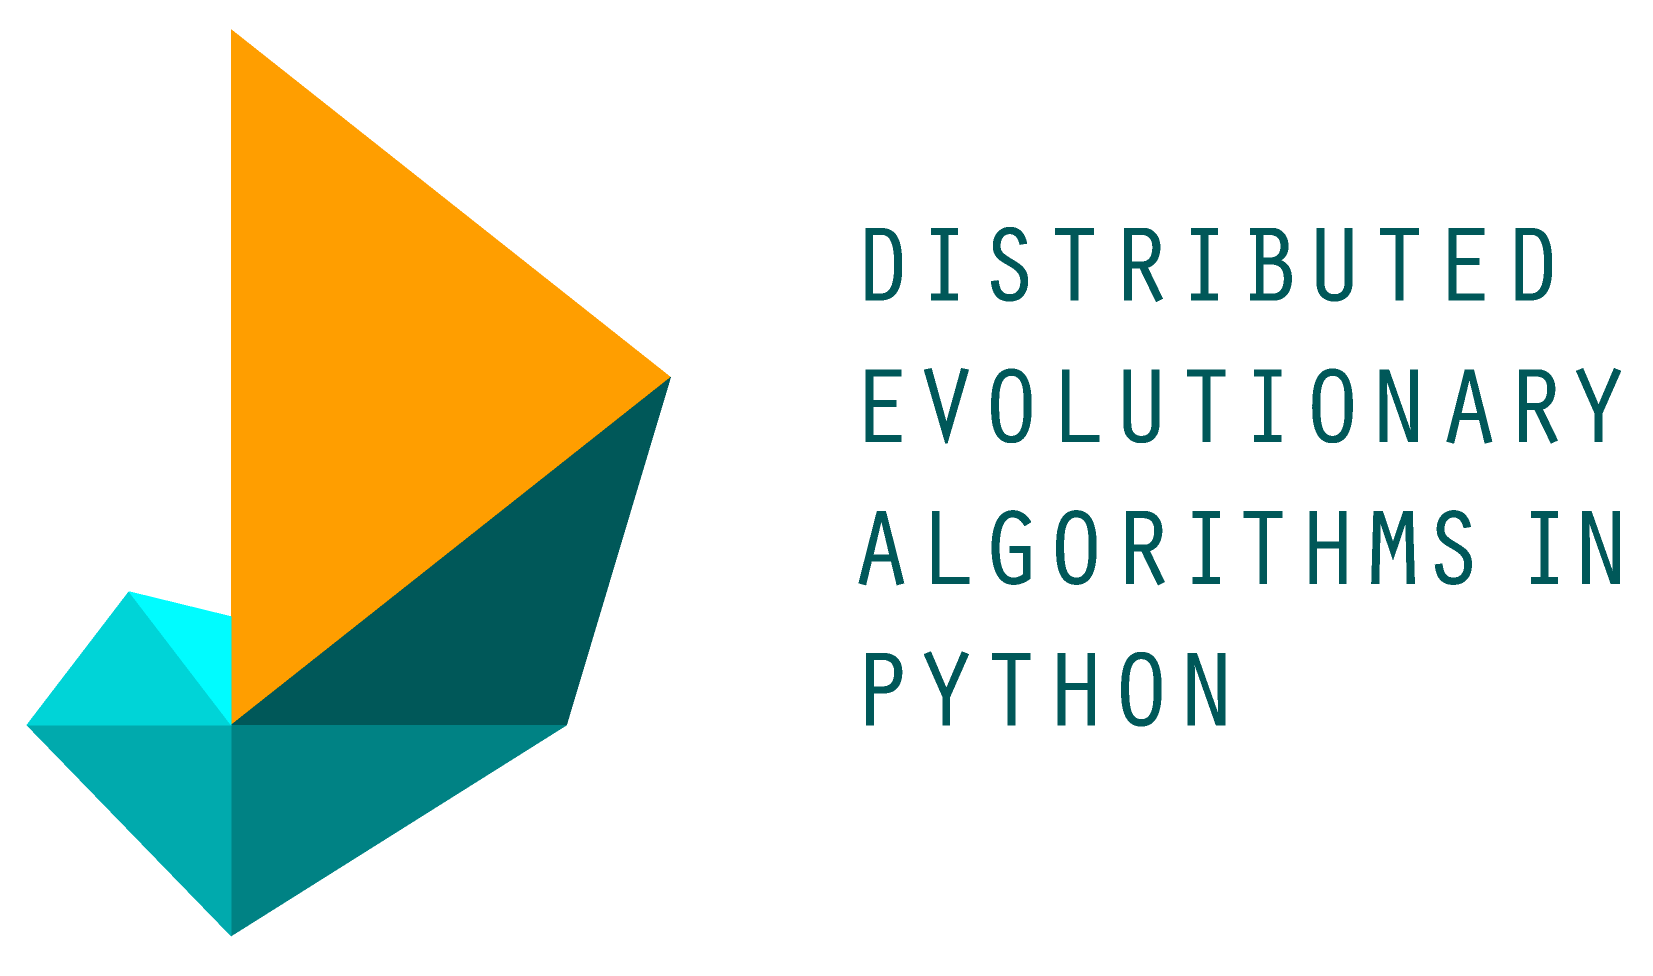


O DEAP é um inovador framework de computação evolutiva projetado para o rápido prototipagem e teste de ideias. Seu objetivo é tornar os algoritmos explícitos e as estruturas de dados transparentes, proporcionando uma abordagem flexível e eficiente para a implementação de algoritmos evolutivos. O DEAP destaca-se pela harmonia perfeita com mecanismos de paralelização, como multiprocessing e SCOOP, facilitando a escalabilidade e a execução eficiente em ambientes distribuídos. A documentação abrangente apresenta conceitos-chave e diversas funcionalidades, oferecendo aos desenvolvedores as ferramentas necessárias para construir suas próprias evoluções e explorar o potencial da computação evolutiva.




# Código

Para instalar a biblioteca DEAP:

In [2]:
pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.1 MB/s eta 0:00:00


Para rodar o código de Agendamento de Horários:

In [3]:
import random
from deap import base, creator, tools, algorithms

NUM_PERIODOS = 4

# Definindo o problema
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Função para gerar informações de disciplinas e professores
def generate_data():
  disciplinas = [
    {"id": 1, "nome": "CC1AED1", "carga_horaria": 90, "professor": "Evandro Da Silva Dos Santos", "periodo": 1, "dia": 2, "mes_ano_ingresso": "Ago/2022"},
    {"id": 2, "nome": "CC1ICC", "carga_horaria": 45, "professor": "Claudio Jose Biazus", "periodo": 1, "dia": 3, "mes_ano_ingresso": "Set/2016"},
    {"id": 3, "nome": "CC1MBD", "carga_horaria": 60, "professor": "Giani Carla Ito", "periodo": 1, "dia": 4, "mes_ano_ingresso": "Mar/2017"},
    {"id": 4, "nome": "HU1LA", "carga_horaria": 45, "professor": "Vera Lucia Vasilevski Dos Santos Araujo", "periodo": 1, "dia": 5, "mes_ano_ingresso": "Jun/2014"},
    {"id": 5, "nome": "MA1FM", "carga_horaria": 60, "professor": "Diego Venancio Thomaz", "periodo": 1, "dia": 6, "mes_ano_ingresso": "Abr/2013"},
    {"id": 6, "nome": "MA1LM", "carga_horaria": 45, "professor": "Evandro Alves Nakajima", "periodo": 1, "dia": 2, "mes_ano_ingresso": "Jun/2014"},
    {"id": 7, "nome": "CC2AED2", "carga_horaria": 60, "professor": "Leiliane Pereira De Rezende", "periodo": 2, "dia": 3, "mes_ano_ingresso": "Set/2019"},
    {"id": 8, "nome": "CC2CLD", "carga_horaria": 60, "professor": "Gloria Patricia Lopez Sepulveda", "periodo": 2, "dia": 4, "mes_ano_ingresso": "Jul/2022"},
    {"id": 9, "nome": "CC2ER", "carga_horaria": 60, "professor": "Luana Menezes Monguilod", "periodo": 2, "dia": 5, "mes_ano_ingresso": "Ago/2023"},
    {"id": 10, "nome": "CC2POO", "carga_horaria": 60, "professor": "Giuvane Conti", "periodo": 2, "dia": 6, "mes_ano_ingresso": "Fev/2016"},
    {"id": 11, "nome": "MA2MA", "carga_horaria": 60, "professor": "Evandro Alves Nakajima", "periodo": 2, "dia": 2, "mes_ano_ingresso": "Jun/2014"},
    {"id": 13, "nome": "OPHE", "carga_horaria": 30, "professor": "Claudio Jose Biazus", "periodo": 2, "dia": 3, "mes_ano_ingresso": "Set/2016"},
    {"id": 14, "nome": "OPHHCA", "carga_horaria": 30, "professor": "Dejane Santos Alves", "periodo": 2, "dia": 4, "mes_ano_ingresso": "Set/2016"},
    {"id": 15, "nome": "OPHIT1", "carga_horaria": 30, "professor": "Vera Lucia Vasilevski Dos Santos Araujo", "periodo": 2, "dia": 5, "mes_ano_ingresso": "Jun/2014"},
    {"id": 18, "nome": "OPHMP", "carga_horaria": 30, "professor": "Vera Lucia Vasilevski Dos Santos Araujo", "periodo": 2, "dia": 6, "mes_ano_ingresso": "Jun/2014"},
    {"id": 20, "nome": "CC3AED3", "carga_horaria": 60, "professor": "Thiago Franca Naves", "periodo": 3, "dia": 2, "mes_ano_ingresso": "Fev/2016"},
    {"id": 21, "nome": "CC3AOC", "carga_horaria": 90, "professor": "Claudio Jose Biazus", "periodo": 3, "dia": 3, "mes_ano_ingresso": "Set/2016"},
    {"id": 27, "nome": "CC4LBD", "carga_horaria": 60, "professor": "Leiliane Pereira De Rezende", "periodo": 4, "dia": 3, "mes_ano_ingresso": "Set/2019"},
    {"id": 28, "nome": "CC4PO", "carga_horaria": 60, "professor": "Gloria Patricia Lopez Sepulveda", "periodo": 4, "dia": 4, "mes_ano_ingresso": "Jul/2022"},
    {"id": 29, "nome": "CC4RC", "carga_horaria": 60, "professor": "Agnaldo Da Costa", "periodo": 4, "dia": 5, "mes_ano_ingresso": "Jun/2014"},
    {"id": 30, "nome": "CC4SO", "carga_horaria": 60, "professor": "Hamilton Pereira Da Silva", "periodo": 4, "dia": 6, "mes_ano_ingresso": "Jul/2013"},
    {"id": 31, "nome": "MA4PE", "carga_horaria": 60, "professor": "Diego Venancio Thomaz", "periodo": 4, "dia": 2, "mes_ano_ingresso": "Abr/2013"},
  ]

  professores = [
    {"nome": "Evandro Da Silva Dos Santos", "disponibilidade": ["Ago/2022"]},
    {"nome": "Claudio Jose Biazus", "disponibilidade": ["Set/2016"]},
    {"nome": "Giani Carla Ito", "disponibilidade": ["Mar/2017"]},
    {"nome": "Vera Lucia Vasilevski Dos Santos Araujo", "disponibilidade": ["Jun/2014"]},
    {"nome": "Diego Venancio Thomaz", "disponibilidade": ["Abr/2013"]},
    {"nome": "Evandro Alves Nakajima", "disponibilidade": ["Jun/2014"]},
    {"nome": "Leiliane Pereira De Rezende", "disponibilidade": ["Set/2019"]},
    {"nome": "Gloria Patricia Lopez Sepulveda", "disponibilidade": ["Jul/2022"]},
    {"nome": "Luana Menezes Monguilod", "disponibilidade": ["Ago/2023"]},
    {"nome": "Giuvane Conti", "disponibilidade": ["Fev/2016"]},
    {"nome": "Thiago Franca Naves", "disponibilidade": ["Fev/2016"]},
    {"nome": "Agnaldo Da Costa", "disponibilidade": ["Jun/2014"]},
    {"nome": "Hamilton Pereira Da Silva", "disponibilidade": ["Jul/2013"]},
  ]

  return disciplinas, professores



# Obtendo dados de disciplinas e professores
disciplinas, professores = generate_data()

# Função de inicialização de um cromossomo (indivíduo)
def init_individual():
    return [(random.choice(disciplinas), random.choice(professores)["nome"]) for _ in disciplinas]

# Função de avaliação (fitness)
def evaluate(individual):
    # Inicialize um dicionário para rastrear a carga horária de cada professor em cada período
    professor_horarios = {professor["nome"]: {f"periodo_{i+1}": 0 for i in range(NUM_PERIODOS)} for professor in professores}

    # Inicialize variáveis para rastrear conflitos e carga horária total
    conflitos = 0
    carga_horaria_total = 0

    # Percorra as disciplinas do indivíduo
    for (disciplina, professor_nome) in individual:
        periodo = disciplina["periodo"]
        carga_horaria = disciplina["carga_horaria"]

        # Obtenha o objeto do professor usando o nome
        professor = next(p for p in professores if p["nome"] == professor_nome)

        # Verifique se o professor está disponível no período
        if periodo in professor["disponibilidade"]:
            # Verifique se há conflito de horário para o professor
            if carga_horaria + professor_horarios[professor["nome"]][f"periodo_{periodo}"] <= 180:
                # Atualize a carga horária do professor no período
                professor_horarios[professor["nome"]][f"periodo_{periodo}"] += carga_horaria
                carga_horaria_total += carga_horaria
            else:
                conflitos += 1
        else:
            conflitos += 1

    # Quanto menor o número de conflitos e maior a carga horária total, melhor é o indivíduo
    fitness_value = conflitos + (1/carga_horaria_total if carga_horaria_total > 0 else 0)

    return (fitness_value,)



# Definindo operadores genéticos
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, init_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Parâmetros do algoritmo genético
population_size = 100
num_generations = 500

# Criando a população inicial
population = toolbox.population(n=population_size)

# Executando o algoritmo genético
algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=2*population_size,
                          cxpb=0.7, mutpb=0.2, ngen=num_generations, stats=None, halloffame=None, verbose=True)

# Obtendo o melhor indivíduo
best_individual = tools.selBest(population, k=1)[0]

# Imprimindo o melhor horário encontrado
print("Melhor Horário Encontrado:", best_individual)

# Obtendo o melhor indivíduo
best_individual = tools.selBest(population, k=1)[0]

# Criando uma tabela vazia
horario_table = [["Horário", "Segunda [2]", "Terça [3]", "Quarta [4]", "Quinta [5]", "Sexta [6]"]]

# Preenchendo a tabela com as disciplinas e professores
for periodo in range(1, NUM_PERIODOS + 1):
    row = [f"P{periodo}"]
    for dia in range(2, 7):
        # Encontrando a disciplina atribuída ao período e dia específico
        disciplina = next((disc for disc, prof in best_individual if disc["periodo"] == periodo and disc["dia"] == dia), None)

        if disciplina:
            # Obtendo informações da disciplina e professor
            nome_disciplina = disciplina["nome"]
            nome_professor = next(prof["nome"] for prof in professores if prof["nome"] == prof["nome"])

            # Construindo a string para a célula da tabela
            cell_content = f"{nome_disciplina}\n({nome_professor})"
        else:
            cell_content = ""

        row.append(cell_content)

    # Adicionando a linha à tabela
    horario_table.append(row)



# Imprimindo a tabela
for row in horario_table:
    print("{:<15} {:<20} {:<20} {:<20} {:<20} {:<20}".format(*row))



# Criando uma tabela vazia
horario_table = [["Horário", "Segunda [2]", "Terça [3]", "Quarta [4]", "Quinta [5]", "Sexta [6]"]]

# Preenchendo a tabela com as disciplinas e professores
for periodo in range(1, NUM_PERIODOS + 1):
    row = [f"P{periodo}"]
    for dia in range(2, 7):
        # Encontrando a disciplina atribuída ao período e dia específico
        assignment = next(((disc, prof) for disc, prof in best_individual if disc["periodo"] == periodo and disc["dia"] == dia), None)

        if assignment:
            # Obtendo informações da disciplina e professor
            disciplina, nome_professor = assignment
            nome_disciplina = disciplina["nome"]

            # Construindo a string para a célula da tabela
            cell_content = f"{nome_disciplina}\n({nome_professor})"
        else:
            cell_content = ""

        row.append(cell_content)

    # Adicionando a linha à tabela
    horario_table.append(row)

# Imprimindo a tabela
for row in horario_table:
    print("{:<15} {:<20} {:<20} {:<20} {:<20} {:<20}".format(*row))

def format_schedule(result):
    formatted_schedule = {}
    for entry in result:
        discipline_info, student = entry
        discipline_name = discipline_info['nome']
        if discipline_name not in formatted_schedule:
            formatted_schedule[discipline_name] = {}
        day = discipline_info['dia']
        period = discipline_info['periodo']
        professor = discipline_info['professor'] if discipline_info['professor'] else "N/A"

        formatted_schedule[discipline_name][(day, period)] = f"{professor} ({student})"

    return formatted_schedule

def print_schedule(schedule):
    days_of_week = ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"]
    periods = ["P1", "P2", "P3", "P4"]

    print("{: <16}".format("Horário"), end="")
    for day in days_of_week:
        print("{: <24}".format(day), end="")
    print()

    for period in periods:
        print("{: <16}".format(period), end="")
        for day in range(2, 7):
            if (day, periods.index(period) + 1) in schedule:
                print("{: <24}".format(schedule[(day, periods.index(period) + 1)]), end="")
            else:
                print("{: <24}".format(""), end="")
        print()

result = [({'id': 29, 'nome': 'CC4RC', 'carga_horaria': 60, 'professor': 'Agnaldo Da Costa', 'periodo': 4, 'dia': 5, 'mes_ano_ingresso': 'Jun/2014'}, 'Giuvane Conti'),
          # Adicione outras entradas conforme necessário
         ]

formatted_schedule = format_schedule(result)
print_schedule(formatted_schedule)



gen	nevals
0  	100   
1  	176   
2  	180   
3  	186   
4  	180   
5  	181   
6  	179   
7  	182   
8  	180   
9  	180   
10 	182   
11 	183   
12 	177   
13 	185   
14 	181   
15 	175   
16 	183   
17 	176   
18 	178   
19 	182   
20 	182   
21 	181   
22 	179   
23 	184   
24 	182   
25 	177   
26 	183   
27 	173   
28 	181   
29 	184   
30 	177   
31 	178   
32 	185   
33 	178   
34 	177   
35 	179   
36 	182   
37 	186   
38 	187   
39 	180   
40 	179   
41 	183   
42 	177   
43 	185   
44 	179   
45 	184   
46 	180   
47 	180   
48 	181   
49 	186   
50 	183   
51 	179   
52 	182   
53 	172   
54 	184   
55 	184   
56 	180   
57 	172   
58 	179   
59 	182   
60 	171   
61 	176   
62 	173   
63 	180   
64 	182   
65 	181   
66 	178   
67 	183   
68 	170   
69 	190   
70 	176   
71 	181   
72 	179   
73 	190   
74 	184   
75 	181   
76 	179   
77 	178   
78 	180   
79 	187   
80 	183   
81 	186   
82 	185   
83 	180   
84 	178   
85 	179   
86 	174   
87 	180   
88 	174   
89 	180   